In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sp
import ast
import math

In [81]:
testFS = "./src/testFS.txt"
testMSE = "./src/testMSE.txt"

levels = [0.1,0.2, 0.3, 0.4, 0.5]
concentrations = [1, 0.1, 0.01]
filenameDic = {}
for l in levels:
    for c in concentrations:
        filenameDic[f"{l},{c}"] = (f"./src/level{int(l*100)}_concentration{int(c*100)}_testMSE.txt",
                                   f"./src/level{int(l*100)}_concentration{int(c*100)}_testFS.txt")

def readFiles(filename):

    with open(filename, 'r') as file:
        string = file.read()

    return np.array(ast.literal_eval(string))

def todict(lst):
    dic = {}
    assert len(lst) == 3
    dic["FS"] = readFiles(lst[0])
    dic["MSE"] = readFiles(lst[1])
    dic["50FS"] = readFiles(lst[2])
    dic["50MSE"] = readFiles(lst[3])
    dic["75FS"] = readFiles(lst[4])
    dic["75MSE"] = readFiles(lst[5])
    
    return dic



In [82]:
standardMSE = readFiles(testMSE)
standardFS = readFiles(testFS)

levels = [0.1,0.2, 0.3, 0.4, 0.5]
concentrations = [1, 0.1, 0.01]
MSEresults = []
FSresults = []
labels = []
for l in levels:
    for c in concentrations:
        labels.append(f"noiselevel:{l},concentration{c*100}%")
        MSEresults.append(readFiles(filenameDic[f"{l},{c}"][0]))
        FSresults.append(readFiles(filenameDic[f"{l},{c}"][1]))
        

MSEresults = pd.DataFrame(MSEresults)
# FSresults = pd.DataFrame(FSresults)

        


In [83]:
print(MSEresults.iloc[0].sum())
print(MSEresults.iloc[1].sum())
print(MSEresults.iloc[2].sum())
print(MSEresults.iloc[3].sum())

0.11320358402179875
0.1120992252927683
0.11412870267090088
0.11835319259857514


In [84]:
print(standardMSE.sum())

0.10964589037841953


## Histogram

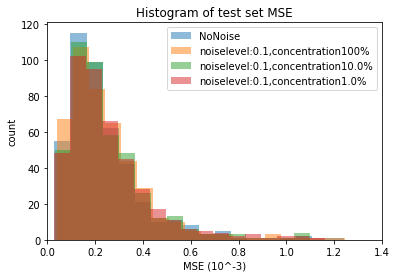

In [60]:
def scale(data):
    return data*1000

standardMSEScaled = scale(standardMSE)

n = math.ceil((standardMSEScaled.max() - standardMSEScaled.min())/0.07)
plt.hist(standardMSEScaled, bins=n,alpha=0.5, label="NoNoise")
# i = 2
# plt.hist(scale(MSEresults.iloc[0+i]),bins=n,alpha=0.5, label=labels[0+i])
# plt.hist(scale(MSEresults.iloc[3+i]),bins=n,alpha=0.5, label=labels[3+i])
# plt.hist(scale(MSEresults.iloc[6+i]),bins=n,alpha=0.5, label=labels[6+i])
# plt.hist(scale(MSEresults.iloc[9+i]),bins=n,alpha=0.5, label=labels[9+i])
plt.hist(scale(MSEresults.iloc[0]),bins=n,alpha=0.5, label=labels[0])
plt.hist(scale(MSEresults.iloc[1]),bins=n,alpha=0.5, label=labels[1])
plt.hist(scale(MSEresults.iloc[2]),bins=n,alpha=0.5, label=labels[2])


plt.title("Histogram of test set MSE")
plt.ylabel("count")
plt.xlabel("MSE (10^-3)")
plt.legend()
plt.xlim([0, 1.4])
plt.show()

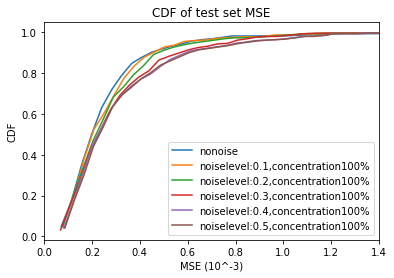

In [103]:
def generateCDF(data, label):
    count, bins_count = np.histogram(data, bins=40)

    pdf = count / sum(count)
    pdf2 = count

    # using numpy np.cumsum to calculate the CDF
    cdf = np.cumsum(pdf)
  
    # plotting CDF
    plt.plot(bins_count[1:], cdf, label=label)
    plt.title("CDF of test set MSE")
    plt.ylabel("CDF")
    plt.xlabel("MSE (10^-3)")
    plt.xlim([0, 1.4])
    plt.legend()
    
generateCDF(standardMSEScaled, "nonoise")
for i in range(0,15,3):
    generateCDF(scale(MSEresults.iloc[i]),label=labels[i])

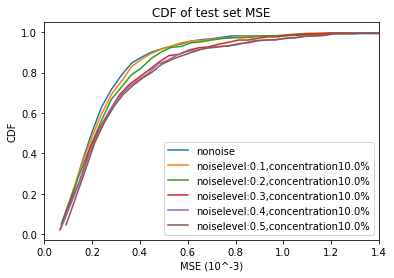

In [102]:
generateCDF(standardMSEScaled, "nonoise")
for i in range(1,15,3):
    generateCDF(scale(MSEresults.iloc[i]),label=labels[i])

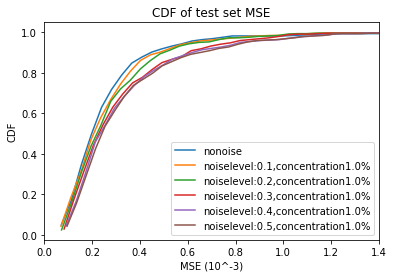

In [104]:
generateCDF(standardMSEScaled, "nonoise")
for i in range(2,15,3):
    generateCDF(scale(MSEresults.iloc[i]),label=labels[i])

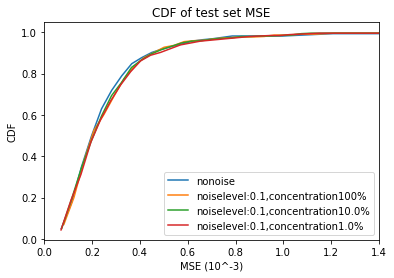

In [111]:
generateCDF(standardMSEScaled, "nonoise")
for i in range(0,3,1):
    i = i
    generateCDF(scale(MSEresults.iloc[i]),label=labels[i])

6
6


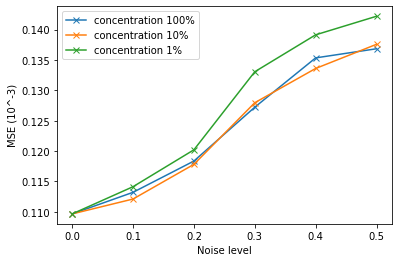

In [46]:
noise = [0] + [0.1,0.2,0.3,0.4,0.5]
lst = [standardMSE.sum()]
lst2 = [standardMSE.sum()]
lst3 = [standardMSE.sum()]
for i in range(0,15,3):
    lst.append(MSEresults.iloc[i].sum())
    lst2.append(MSEresults.iloc[i+1].sum())
    lst3.append(MSEresults.iloc[i+2].sum())
    
print(len(noise))
print(len(lst))
fig, ax = plt.subplots()
ax.plot(noise,lst, '-x', label='concentration 100%')
ax.plot(noise,lst2, '-x', label='concentration 10%')
ax.plot(noise,lst3, '-x', label='concentration 1%')
plt.ylabel("MSE (10^-3)")
plt.xlabel("Noise level")
plt.legend()
plt.show()

## Scatterplot (figure 6E)

In [65]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.metrics import mean_squared_error


def generateScatterplot(data,title):
    measured, predicted = data[:,0], data[:,1]

    # Calculationg pearson r
    pearsonr = sp.pearsonr(measured,predicted)[0]

    # Calculation of Mean Squared Error (MSE)
    MSE = mean_squared_error(measured,predicted)

    #Plot measured vs. predicted frameshift ratio
    fig, ax = plt.subplots()
    ax.scatter(measured,predicted, c='skyblue',s=6)
    ax.set_xlim((0,1.05))
    ax.set_ylim((0,1.05))
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    line = mlines.Line2D([0.1, 1], [0.1, 1], color='red')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    ax.text(0.01, 0.95,"pearson r: " + str(round(pearsonr,4)),
         horizontalalignment='left',
         verticalalignment='center',
         transform = ax.transAxes)
    ax.text(0.01, 0.85,"MSE: " + str(round(MSE,4)),
         horizontalalignment='left',
         verticalalignment='center',
         transform = ax.transAxes)
    plt.title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("Predicted frameshift ratio",fontsize=14)
    plt.xlabel("Measured frameshift ratio",fontsize=14)
    plt.show()

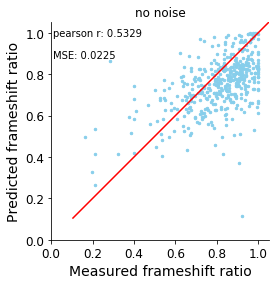

In [66]:
generateScatterplot(standardFS,"no noise")

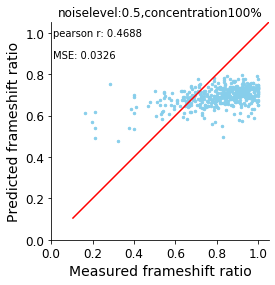

In [90]:
generateScatterplot(FSresults[12], labels[12])

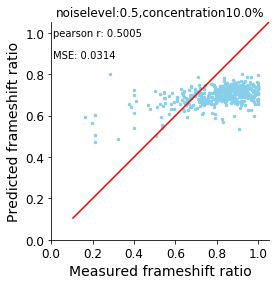

In [91]:
generateScatterplot(FSresults[13],labels[13])

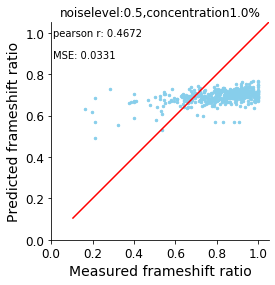

In [92]:
generateScatterplot(FSresults[14],labels[14])

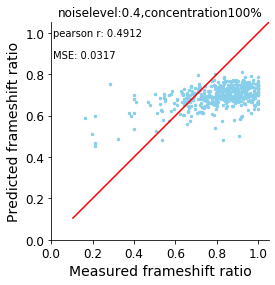

In [70]:
generateScatterplot(FSresults[9],labels[9])

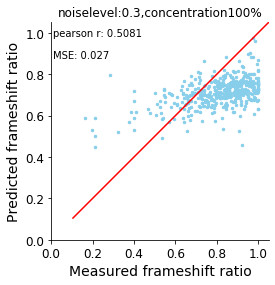

In [79]:
generateScatterplot(FSresults[6],labels[6])

In [31]:
def computevalues(data):
    measured, predicted = data[:,0], data[:,1]
    # Calculationg pearson r
    pearsonr = sp.pearsonr(measured,predicted)[0]

    # Calculation of Mean Squared Error (MSE)
    MSE = mean_squared_error(measured,predicted)
    
    return (pearsonr, MSE)

lst = []
lst.append(computevalues(standardFS))

for i in range(0,13,3):
    i = i
    lst.append(computevalues(FSresults[i]))
    
print(lst)

[(0.5328956929266447, 0.022450787472548934), (0.5102914663040102, 0.022790300756614684), (0.5297569142086118, 0.026252612404238727), (0.5081262859894222, 0.02702040751125052), (0.49117968402212514, 0.031710032017372554), (0.46881105985083665, 0.032572326283358835)]


6
6


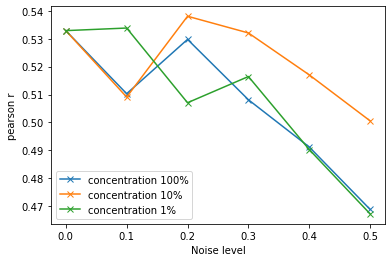

In [52]:
def computepearson(data):
    measured, predicted = data[:,0], data[:,1]
    # Calculationg pearson r
    pearsonr = sp.pearsonr(measured,predicted)[0]
    MSE = mean_squared_error(measured,predicted)

    return pearsonr

noise = [0] + [0.1,0.2,0.3,0.4,0.5]
lst = [computepearson(standardFS)]
lst2 = [computepearson(standardFS)]
lst3 = [computepearson(standardFS)]
for i in range(0,15,3):
    lst.append(computepearson(FSresults[i]))
    lst2.append(computepearson(FSresults[i+1]))
    lst3.append(computepearson(FSresults[i+2]))
    
print(len(noise))
print(len(lst))
fig, ax = plt.subplots()
ax.plot(noise,lst, '-x', label='concentration 100%')
ax.plot(noise,lst2, '-x', label='concentration 10%')
ax.plot(noise,lst3, '-x', label='concentration 1%')
plt.ylabel("pearson r")
plt.xlabel("Noise level")
plt.legend()
plt.show()